In [1]:
import math as m
import numpy as np
import random as rnd
import re
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import factorial2
from scipy.special import factorial
from scipy.special import binom
import scipy.stats as sps
%matplotlib inline

# 3.1

You are playing a game of Russian Roulette with one other person. The rules of game are as follows: a bullet is placed randomly in one of six chambers of a gun, and the players take turns pulling the trigger (if the bullet chamber comes up, the bullet fires and the player loses, otherwise the gun does not fire and the game continues). Every time the trigger is pulled, the chambers rotate so that a new chamber comes into the ‘firing position’ (so at maximum, the gun is fired six times).  

a. If you would like to maximize your chances of winning this game, should you go first or second?  

b. Re-solve part (a) in the case of a game of Russian Roulette using a gun with n chambers, where n≥2 is an even number.  

c. Re-solve part (b) in the case where n>2 is an odd number. Discuss what happens as n→∞.  

d. Return to the conventional set-up of the game as described at the start of the problem. Let X be the number of blanks fired (trigger pulls before the bullet is fired, not including the bullet firing). Remember that the game ends when the bullet is fired. Explain why X is NOT Geometric.  

e. Continuing as in (d), find E(X).  

### 3.1 Analytical Solution

(a)

We can reformulate the question without thinking about the conditional dependence of going turn by turn. We can think of player 1 as owning slots [1,3,5] and player 2 owning [2,4,6]. The bullet has an equal probability of being in any one of the slots. Since the players both own an equal number of slots, they have an equal chance of getting the bullet. 

(b)

The same logic from (a) applies here. By symmetry, since the players have an equal number of slots, their probabilities of getting the bullet must be equal as well. Again, it doesn't matter who goes first.

(c)

Conceptually, the player who goes first gets more chambers and therefore has a higher probability of getting the bullet. Let's actually try to work through the conditional dependence of getting a bullet at each turn. For any turn, we need to account for the probability of getting the bullet on that turn *and* the probability that the previous turns didn't get the bullet. Let's see what this looks like for a game with 5 chambers.

Gun chambers:  
[1,2,3,4,5]  

Player 1 gets [1,3,5]  
Player 2 gets [2,4]  

Probability of bullet on turn x:  
[x,o,o,o,o] | P(1) = 1/5  
[o,x,o,o,o] | P(2) = 4/5 x 1/4 = 1/5  
[o,o,x,o,o] | P(3) = 4/5 x 3/4 x 1/3 = 1/5  
[o,o,o,x,o] | P(4) = 4/5 x 3/4 x 2/3 x 1/2 = 1/5  
[o,o,o,o,x] | P(5) = 4/5 x 3/4 x 2/3 x 1/2 x 1 = 1/5  

P(player 1) = 1/5 + 1/5 + 1/5 = 3/5  
P(player 2) = 1/5 + 1/5 + 1/5 = 2/5  

So the conditional probabilities match the argument of symmetry from (a) and (b). When the game has an odd number of chambers, the first player has $\frac{(n+1)}{2}$ moves. $n$ is the total number of chambers. Since each move has a probability of $\frac{1}{n}$ of losing, the total probability of player one losing is $\frac{(n+1)}{2} * \frac{1}{n} = \frac{(n+1)}{2n}$. If we take the limit of this ratio as $n$ approaches $\infty$ it basically becomes 1/2. For a low number of chambers, the first player has a noticeably larger probability of losing the game. However, as the number of chambers becomes very large, this imbalance matters less.

(d)

$X$ is not Geometric because it is bounded above, there is a finite number of blanks. The probability of firing a blank also changes after each round - the $p$ parameter is not a constant in this problem. In other words, the process is not memoryless while the distribution is.

(e)

Rather than focusing on the probabilities of getting a certain number of blanks, we can look at the probability of getting a bullet at a specific round. This will give us the number of blanks fired before the losing round. We can then use the definition of the expectation operator to get the value we want:

## $E(X) = \sum\limits_{i} x_iP(X=x_i)$

Lose on turn   | [ 1 ,  2 ,  3 ,  4 ,  5 ,  6 ]  
Blanks before  | [ 0 ,  1 ,  2 ,  3 ,  4 ,  5 ]  
Prob of losing | [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]  
Weighted prob  | [0/6, 1/6, 2/6, 3/6, 4/6, 5/6]  

Sum of weighted probabilities = E(X) = 2.5  

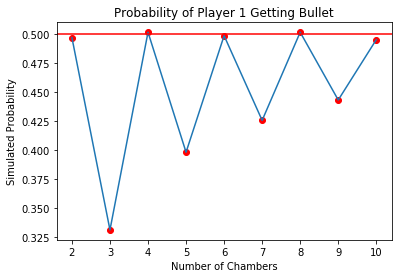

In [2]:
# Simulating a single game
# Probability of player 1 losing (getting bullet)
def game_sim(n):

    chambers = np.zeros(n)

    # Assign bullet to a random chamber
    chambers[np.random.randint(low = 0, high = n, size = 1)] = 1

    # Determining which player has ownership over the bullet chamber
    player0 = np.sum(chambers[np.arange(start = 0, stop = n, step = 2)])
    player1 = np.sum(chambers[np.arange(start = 1, stop = n-1, step = 2)])

    if player0 == 1:
        return 0
    else:
        return 1
    
game_sim = np.vectorize(game_sim)


# Simulating many games for a given chamber size
def many_game_sim(n, sims = 10000):

    return np.mean(game_sim(np.full(sims,n)))

many_game_sim = np.vectorize(many_game_sim)

#

probs = pd.DataFrame({
    'Chambers': np.arange(2,11),
    'Prob': many_game_sim(np.arange(2,11))
})


_ = plt.plot(probs['Chambers'],
             probs['Prob'], 
             'ro')

_ = plt.plot(probs['Chambers'],
             probs['Prob'])

_ = plt.axhline(y = 0.5, color = 'r', linestyle = '-')

_ = plt.ylabel('Simulated Probability')
_ = plt.xlabel('Number of Chambers')

_ = plt.title('Probability of Player 1 Getting Bullet')

# We can see the imbalance mattering less as we get more chambers
# For even numbers, the probability is basically .50 (plus simulation variance)

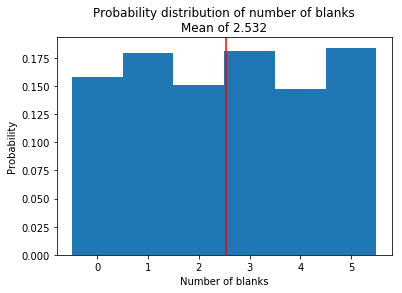

In [3]:
# Simulating number of blanks
def num_blanks(n = 6):
    chambers = np.zeros(n)

    # Assign bullet to a random chamber
    chambers[np.random.randint(low = 0, high = n, size = 1)] = 1
    
    return np.where(chambers == 1)[0] 

#

num_blanks = np.vectorize(num_blanks)

blank_sims = num_blanks(np.full(1000,6))

#

_ = plt.hist(blank_sims, density = True, bins = [0,1,2,3,4,5,6], align = 'left')

_ = plt.ylabel('Probability')

_ = plt.xlabel('Number of blanks')

_ = plt.axvline(x = np.mean(blank_sims), color = 'r', linestyle = '-')

_ = plt.title('Probability distribution of number of blanks\nMean of %s' % (np.mean(blank_sims)))

# 3.2

The Negative Hypergeometric distribution is a discrete distribution that takes three parameters, n = total number of balls, k = number of white balls, and r = number of black balls when the experiment is stopped (i.e., after observing r black balls, we stop drawing balls). If X ~ NHgeom(n,k,r), then X counts the number of white balls sampled from n balls (without replacement) until we have sampled r black balls.

a. Explain how this distribution is similar to and different from a Hypergeometric distribution.

b. If X ~ NHgeom(n,k,r), $E(X)=\frac{rk}{n−k+1}$. Use this fact to provide a more elegant Solution: to 3.1 (the Russian Roulette problem.)

### 3.2 Analytical Solution

(a) The Hypergeometric distribution has a constant number of draws - we can still see samples after the target number of successes. The Negative Hypergeometric ends the sampling process after the target number of successes, giving us a varying total sample size. This dynamic is further summarized by the table at the bottom of this [wiki](https://en.wikipedia.org/wiki/Negative_hypergeometric_distribution) page.

(b) We can redefine the variables as:  
$\text{n = total number of chambers = 6}$  
$\text{k = number of blank chambers = 5}$  
$\text{r = number of bullets = 1}$

This gives us the anaytical expectation:
## $E(X)=\frac{rk}{n−k+1} = \frac{5*1}{6-5+1} = \frac{5}{2} = 2.5$

# 3.3

Let X∼Pois(cλ), where c is a positive integer. Let Y∼Pois(λ) and Z∼cY. Are X and Z identically distributed? That is, do they have the same distribution (i.e., two quarters, when flipped, are different random variables, but both have a Bern(1/2) distribution if we are counting the number of heads)?

### 3.3 Analytical Solution

Intuitively, these should be different since λ shows up in the exponent of the Poisson PMF, so any modification would create a nonlinear effect. Let's first write down all of the PMFs:

Poisson:  

## $P(W = W) = \frac{e^{-\lambda}\lambda^w}{w!}$

X:  

## $P(X = x) = \frac{e^{-c\lambda}(c\lambda)^x}{x!}$

We can strip away the 'random' part of Y and Z to think about setting up the PMF. If [z = c * y] then [Y = z/c]. We already know the PMF of Y, its just the Poisson. If we substitute z/c in Y's PMF, we essentially get the PMF of Z for free.

## $P(Z = z) = \frac{e^{-\lambda}\lambda^{(z/c)}}{(z/c)!}$

These are clearly very different looking PMFs - unless c = 1, in which case they are exactly the same. The plots below underline this point.

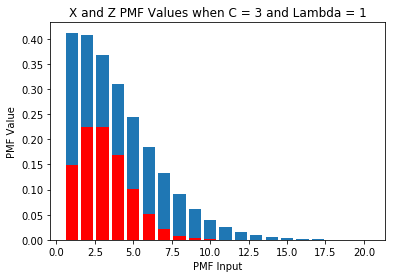

In [4]:
def pmf_x(x, c = 3, lam = 1):
    return (np.exp(-c*lam)*(c*lam)**x)/factorial(x)

pmf_x = np.vectorize(pmf_x)

#

def pmf_z(z, c = 3, lam = 1):
    return (np.exp(-lam)*(lam)**(z/c))/factorial(z/c)

pmf_z = np.vectorize(pmf_z)

#

probs = pd.DataFrame({
    'Value': np.arange(1,21),
    'Prob_x': pmf_x(np.arange(1,21)),
    'Prob_z': pmf_z(np.arange(1,21))
})

#_ = plt.bar(probs['Value'], probs['Prob_x'], width = 0.8, align = 'center')

ax = plt.subplot(111)

ax.bar(probs['Value'], probs['Prob_z'], width = 0.8, align = 'center')
ax.bar(probs['Value'], probs['Prob_x'], color='r', width = 0.8, align = 'center')

_ = plt.ylabel('PMF Value')

_ = plt.xlabel('PMF Input')

_ = plt.title('X and Z PMF Values when C = 3 and Lambda = 1')


plt.show()

# 3.4

Nick’s favorite word is ‘no’. In fact, he loves the word ‘no’ so much that he employs the following pattern of speech: for every word he speaks, he says ‘no’ with probability 1/4 and some word other than ‘no’ with probability 3/4, independently across words. You have a conversation with Nick where he says n ≥ 3 words. Find the expected number of times that he says “no no no”. If he says “no no no no”, this counts as two “no no no” phrases (the first ‘no’ to the third ‘no’, and then the second ‘no’ to the fourth ‘no’).



### 3.4 Analytical Solution

Let's think about the possible locations for 'no no no' in a sequence of 5 words. 1 is a 'no' and 0 is anything else.

[1,1,1,0,0]  
[0,1,1,1,0]  
[0,0,1,1,1]  

We're essentially sliding the 111 sequence from left to right until we hit a wall. For any sequence of length 3, there will be (n-2) locations where it can fit, where n is the total number of slots. Next, we can think about using the linearity and symmetry of the expectation operator:

$E(X) = E(Seq[1,2,3] + Seq[2,3,4] ...)$  
$E(X) = E(Seq[1,2,3]) + E(Seq[2,3,4]) ...$  
$E(X) = (n-2)*E(Seq[1,2,3])$  

Finally, we need to think about the probability of observing the sequence in locations [1,2,3]. Since observing each 'no' is independent, we can just multiply the probabilities of each one. That is:

P('no no no') = 1/4 x 1/4 x 1/4  

Bringing it all together:  

## $E(\text{'no no no'}) = (n-2) * \frac{1}{4^3} = \frac{n-2}{4^3}$

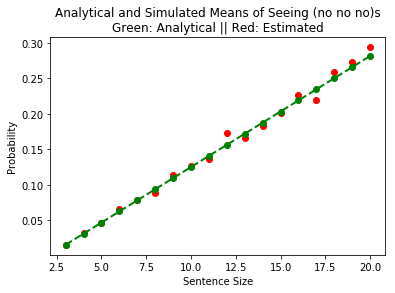

In [5]:
# Borrowed from https://stackoverflow.com/questions/42129021/counting-consecutive-1s-in-numpy-array
# Counts consecutive 1s in an array resets at 0
def island_cumsum_vectorized(a):
    a_ext = np.concatenate(( [0], a, [0] ))
    idx = np.flatnonzero(a_ext[1:] != a_ext[:-1])
    a_ext[1:][idx[1::2]] = idx[::2] - idx[1::2]
    return a_ext.cumsum()[1:-1]

# Simulating a single draw of words
def sim_words(n):
    # Sampling words
    seq = np.random.choice([0,1], size = n, replace = True, p = [3/4,1/4])

    counts = island_cumsum_vectorized(seq)
    
    return np.sum(counts >= 3)

#

# Simulating many draws of words, size n
def many_sim_words(n, sims = 5000):
    
    return np.mean([sim_words(n) for i in range(sims)])

#

many_sim_words = np.vectorize(many_sim_words)

# Analytical solution
def real_probs(n):
    return (n-2)/(4**3)

real_probs = np.vectorize(real_probs)

#

lens = np.arange(3,21)

probs = pd.DataFrame({
    'Len': lens,
    'Prob_Est': many_sim_words(lens),
    'Prob_Real': real_probs(lens)
})


_ = plt.plot(probs['Len'],
             probs['Prob_Est'], 
             'ro')

_ = plt.plot(probs['Len'],
            probs['Prob_Real'],
            'go--',
            linewidth = 2)

_ = plt.ylabel('Probability')
_ = plt.xlabel('Sentence Size')

_ = plt.title('Analytical and Simulated Means of Seeing (no no no)s\nGreen: Analytical || Red: Estimated')

# 3.5

The first chord in the song Bohemian Rhapsody by Queen is a ‘B flat 6’, which is correctly played with 4 distinct keys on a 88 key piano.

a. You randomly select 4 distinct keys on a piano and play them together (as a chord) until you play the B flat 6 (in the correct key; again, there are only 4 correct keys). Let X be the number of chords you play (including the B flat 6), and find E(X).

Hint: Remember, a Geometric random variable ‘doesn’t count the success’, but a First Success distribution does.  

b. The first lyrics in the song are “Is this the real life”. Imagine that you speak words at random until you have dictated these opening lyrics verbatim. Let Y be the number of words you speak until you have recited these lyrics. Explain why Y does not have the same distribution as X (not just the same distribution with a different parameter, but a different distribution altogether).  

In [6]:
# 3.5.a
# Let's pretend there are 10 keys instead of 88
# We want keys [1,2,3,4]
def key_sample(n = 10):

    keys = np.arange(1,n+1)

    sample = np.random.choice(keys, size = 4, replace = False)

    return np.sum(sample) == 10

key_sample = np.vectorize(key_sample)

#

print('Probability of B flat 6:')
print(np.mean(key_sample(np.full(10000,10))))

Probability of B flat 6:
0.0053


### 3.5.a Analytical Solution

We are sampling 4 keys out of 88 without replacement where order doesn't matter. The probability of observing this event is 1 in $\binom{88}{4} = 2,331,890$. The expected value of the First Success distribution is 1/p, which means we need to play 2,331,890 chords (on average) to observe a B flat 6. Something to keep in mind here is the fact that the variance is going to be extremely large due to the small size of p.

### 3.5.b Analytical Solution

The problem here is that the words are not independent, the underlying distribution is not memoryless. Consider this part of the infinitely long sample of words:

I love Bayesian inference it is this the real life  
[I love Bayesian inference it][**is**][this the real life]  

The brackets are just there to split up the stream of words. We can see that after we observe 'is', the probability of observing the rest of the lyrics goes up. In other words, looking for a particular *sequence* of words in a process that generates one word at a time is not a memoryless process. The First Success/Geometric distribution models a memoryless process.

# 3.6

Datamatch is a Harvard Valentine’s day program where you fill out a questionairre and are matched based on some ‘compatability scores’ with other students who filled out the questionairre.

Say, for the purpose of this problem, that Harvard Datamatch is undergoing some reconstruction. Instead of giving you your top 10 matches as in the past, intimacy is being brought up a notch, and you are only given one match: the top person that you were compatible with. However, sadly, that doesn’t necessarily mean that they were matched with you: they could be given anyone. Say also that, even more unfortunately, the secret love algorithm is just a random generator that assigns you your top ‘match’ completely randomly, and there is no special sauce behind the scenes (you have an equal chance of getting everyone else in Datamatch as your top match).

Finally, you can’t be matched with yourself, and assignments do not have to be unique (one person can be the top match for multiple other people). This year, 100 people decided to fill out Datamatch.

a. Say that you are one of the 100 people doing Datamatch and are given your true love for your top intimacy match. What is the probability that they also got you as their top match?  

b. A ‘lovebird pair’ occurs when two people get each other as their top intimacy match. Let M be the number of lovebird pairs. Find E(M).  

### 3.6.a Analytical Solution

You've already matched with them, so what we care about now is their probability. Since there are 100 people in the pool and they can't be matched to the themselves, there's a $\frac{1}{99}$ chance they'll match with you too.

In [7]:
# Simulating 3.6.b
def datamatch_round(pool_size = 5):
    
    # Setting up pool of suitors
    pool = np.arange(1,pool_size+1)
    
    # Sampling pair, excluding self
    def random_pair(inx):
        return np.random.choice(np.delete(pool,inx),1)

    random_pair = np.vectorize(random_pair)
    
    # Creating random pairings
    samp = np.column_stack((pool,
                    random_pair(pool-1)))

    samp = np.sort(samp,axis=1)

    # Pool size - unique pairings = duplicate pairs
    return pool_size - np.unique(samp,axis=0).shape[0]

#

round_sims = np.mean([datamatch_round(100) for i in range(1000)])

print('Average # of lovebird pairs:')
print(round_sims)

Average # of lovebird pairs:
0.509


### 3.6.b Analytical Solution

We can set this up using indicator random variables and solve using the expectation operator.

E(M) = E[I(1 & 2 match)] + E[I(1 & 3 match)] + E[I(1 & 4 match)] ...  

We know that there are $\binom{100}{2}$ indicators, that is the number of pairs we can make without replacement where order doesn't matter. If we think about any particular pair we have:  

### $\text{P(x matching y) & P(y matching x)} = \text{P(x matching y) * P(y matching x)} = \frac{1}{99} *\frac{1}{99} = \frac{1}{99^2}$

We can observe this probability as many times as there are pairs. That means, the expected number of pairs is:

## $E(M) = \frac{\binom{100}{2}}{99^2} = .50505...$

# 3.7

Recall the ‘hospital problem’. There are n couples (two parents), each of which has exactly 1 child. There is a mix-up at the hospital, and the n children are distributed randomly among the n couples. Let X be the number of couples that get their baby back.

a. As a refresher, find E(X).

b. Approximate P(X=0), the probability that no one gets their baby back, as n→∞.

### 3.7 Analytical Solution

(a)  

Let's reiterate the general approach to these problems below:  
1) Define some indicator random variables  
2) Symbolically write down the sum of the above  
3) Find the expectation of just one  
4) Multiply the one by the number of indicators  

For this problem we can define I(j) as the probability that couple j gets their baby back. So:

E(X) = E[I(1)] + E[I(2)] + E[I(3)] ... = nE[I(1)]  

If we focus our attention on any one couple, we can see that their probability of getting the correct baby back is just 1/n. If there are 10 couples and 10 babies, each couple has a 1/10 probability of being matched up with their baby. Using the result above, we can see that:

## $E(X) = nE[I(1)] = n*\frac{1}{n} = 1$

On average, 1 couple will be correctly matched with their baby.

(b)  

If each couple has a 1/n probability of getting their baby back, they have a (n-1)/n probability of *not* getting their baby back. Even though these probabilities are dependent, this effect gets weaker as the number of babies tends towards infinity. We can therefore multiply the probabilities to approximate P(0). This gives us:

## $\text{E(no matches)} = lim_{n\to\infty} (\frac{n-1}{n})^n = lim_{n\to\infty} (1 - \frac{1}{n})^n = \frac{1}{e}$

You can find the proof that the limit equals 1/e [here](https://socratic.org/questions/how-do-you-find-the-limit-of-1-1-x-x-as-x-approaches-infinity).

We can also remember that having many (even loosely dependent) events and a small probability of success is the ideal setup for the Poisson distribution. λ is the mean, which we have shown to be 1. That's the only thing we need to parameterize the PMF. Using this, we can see:

## $P(X = 0) = \frac{e^{-1}*1^0}{0!} = e^{-1}$

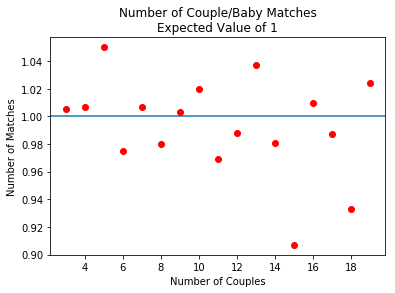

In [8]:
# Simulating a single round
def sim_round(n = 10):
    parents = np.arange(1,n+1)
    babies = np.arange(1,n+1)

    np.random.shuffle(parents)
    np.random.shuffle(babies)

    return np.sum(parents == babies)

#

def many_round_sim(n, size = 1000):
    return np.mean([sim_round(n) for i in range(size)])

many_round_sim = np.vectorize(many_round_sim)

#

ns = np.arange(3,20)

probs = pd.DataFrame({
    'ns': ns,
    'num_matches': many_round_sim(ns)
})


_ = plt.axhline(y = 1)

_ = plt.plot(probs['ns'],
             probs['num_matches'], 
             'ro')

_ = plt.ylabel('Number of Matches')
_ = plt.xlabel('Number of Couples')

_ = plt.title('Number of Couple/Baby Matches\nExpected Value of 1')

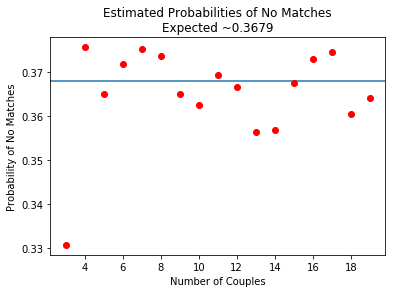

In [9]:
# Simulating a single round
# Only returning 1 if there was no matches
def sim_round_nomatch(n = 10):
    parents = np.arange(1,n+1)
    babies = np.arange(1,n+1)

    np.random.shuffle(parents)
    np.random.shuffle(babies)

    if np.sum(parents == babies) > 0:
        return 0
    else:
        return 1 

#

def many_round_nomatch(n, size = 10000):
    return np.mean([sim_round_nomatch(n) for i in range(size)])

many_round_nomatch = np.vectorize(many_round_nomatch)

#

ns = np.arange(3,20)

probs = pd.DataFrame({
    'ns': ns,
    'no_match_prob': many_round_nomatch(ns)
})


_ = plt.axhline(y = np.exp(-1))

_ = plt.plot(probs['ns'],
             probs['no_match_prob'], 
             'ro')

_ = plt.ylabel('Probability of No Matches')
_ = plt.xlabel('Number of Couples')

_ = plt.title('Estimated Probabilities of No Matches\nExpected ~%s' % (np.round(np.exp(-1),4)))

# 3.8

There are 50 states in the USA; assume for this problem that you have been to none of them. You visit the states at random (for each ‘round’ you randomly select one of the 50 to visit, even if you have already visited it) until you have visited every state. On average, how many visits will you make before you visit every state?

In [10]:
def sim_path(n = 50):

    states = np.arange(1,n+1)

    num_trips = 0

    while True:

        visit = np.random.randint(low = 1, high = n+1)

        states[visit-1] = 0

        num_trips += 1

        if np.sum(states) == 0:
            break
    
    return num_trips

#

np.mean([sim_path(n=50) for i in range(1000)])

224.972

### 3.8 Analytical Solution

Let's think about a simpler case, one with only 5 states. We can set up the states as [1,2,3,4,5] and imagine crossing a state off the list after we've visited it. We can visit [3,4,5,1,2] all in one go or take a longer trip like [**1**,1,1,**2**,1,**3**,**4**,3,**5**]. Now let's think about observing our $n^{th}$ **unique** state:  

1) P(1st) = 1, the first state we see will always be a new state  
2) P(2nd) = 4/5, we've already used up one state - only 4 'new' ones to see, 5 possible choices  
3) P(3rd) = 3/5, same as above but we've used up two states, only 3 'new' states to see  
3) P(4th) = 2/5  ...  
3) P(5th) = 1/5  ...  

We can model each of the above individually using the First Success distribution - they are not identically distributed (different p values) but they are independently distributed. Observing state 2 vs. state 4 as the second unique state doesn’t change any of the probabilities above. The expected value of the First Success distribution, 1/p, gives the average number of observations before *and* including the first success for an event with probability p.

Let's convert the probabilities into expected values, which operate under the Linearity of Expectation:

## $E(X + Y) = E(X) + E(Y)$

### $\text{E(1st + 2nd + 3rd + 4th + 5th)} = \text{E(1st) + E(2nd) + E(3rd) + E(4th) + E(5th)}$

### $\text{E(average of total trip)} = 5/4 + 5/3 + 5/2 + 5/1 \approx 11.417$

We can generalize the solution to any number of states, including 50:  

## $\sum_{n=0}^{N-1} \frac{N}{N-n} = \sum_{n=0}^{49} \frac{50}{50-n} \approx 224.96$

# 3.9

Let $I_A$ and $I_B$ be the indicators for events A and B, respectively. Let $p_A=P(A)$ and $p_B=P(B)$. Find the distribution of $I_A^{I_B}$.

### 3.9 Analytical Solution

Let's remember that an indicator random variable can only take on values 1 and 0, with probabilities p and 1-p respectively. Let's look at the interaction effect between the two variables:

I(A) ||   1   1   0   0  
I(B) ||   1   0   1   0  
$I_A^{I_B}$  |||   1   0   1   1  

We can see two things: the random variable has support [0,1] and that 0 only happens when I(A) = 0 & I(B) = 1. Since the support is [0,1] we already know this is a Bernoulli random variable. Now all we need is P(1) or P(0). We can get P(0) easily because there's only one way to observe this:

## $P(I_A^{I_B} = 0) = P(I_A = 0) \text{ & } P(I_B = 1) = (1-P(A))P(B)$  
This mean that:  

## $P(I_A^{I_B} = 1) = 1 - (1-P(A))P(B)$  

So $I_A^{I_B} \sim \operatorname{Bern} \left({1 - (1-P(A))P(B)}\right)$

In [11]:
p_a = 0.7
p_b = 0.3

print('Simulated P(Bern):')
print(np.mean([np.random.binomial(1,p_a) ** np.random.binomial(1,p_b) for i in range(1000)]))

print('\n')

print('Analytical P(Bern):')
print(1 - (1-p_a)*p_b)

Simulated P(Bern):
0.906


Analytical P(Bern):
0.91


# 3.10

Imagine 5 unconnected points in the shape of a pentagon.

Imagine selecting two points at random and drawing a straight line in between the two points. Do this 5 times, with the constraint that you cannot select the same pair twice. What is the probability that the lines and points form a pentagon (i.e., a five-sided, five-angled, closed shape)?

We saw this problem earlier in a counting context. Now, solve this problem using the Hypergeometric distribution.

### 3.10 Analytical Solution

We need at minimum 5 pairs of points to construct the shape. Since there are 5 points in total, there are $\binom{5}{2} = 10$ possible pairs. So we have a population with 5 desirable pairs, 5 undesirable pairs, and our sample is only 5 pairs. We're also sampling *without* replacement, which means our question boils down to:

### $P(X = 5)$ where $X \sim HGeom(5,5,5)$

This becomes:  

# $\frac{\binom{5}{5}\binom{5}{5-5}}{\binom{5+5}{5}} = \frac{1}{252} \approx 0.3968\%$

In [12]:
# Reproduced from problem 1.11
# Get all pairs of points
combs = list(it.combinations([1,2,3,4,5],2))

# Setup for simulations
num_sims = 10000

pent = np.zeros(num_sims)

for i in range(num_sims):
    
    rnd.shuffle(combs)

    choices = sorted(combs[0:5])

    if choices == [(1,2),(1,5),(2,3),(3,4),(4,5)]:
        pent[i] = 1

pent.mean()

0.0044

# 3.11

There are n people with red hats and n people with blue hats in a room. The people randomly pair off (i.e., they are each randomly paired with another person). Let X be the number of pairs with matching hat colors (i.e., a pair where both people have red hats).

a. Find E(X).  
b. Let Y be the number of pairs that don’t have matching hat colors (one in the pair has a red hat and one has a blue hat). Find E(Y).  
c. Which is larger, E(X) or E(Y)? Why? How do they compare for large n?  
d. What is E(X)+E(Y)?  

### 3.11 Analytical Solution

(a)  

Let's think of a simple case where n = 4. Here's what that looks like:  

[R,R,R,R,B,B,B,B]  

Using the linearity of expectation, we can just focus on the expected value of a match for the first person and then scale the result by $n$ to get the total expectation. If the first person got a red hat, they can match to any of the remaining 3 red hats. There are 7 hats in total remaining.

[**R**,*R*,*R*,*R*,B,B,B,B]  

The general pattern is:  

## $\frac{\text{# of same hats left}}{\text{total # of hats left}} = \frac{n-1}{2n-1}$

Remember, this is the expected value for the first person getting a match. We need to scale this up by $n$ to get the total expected value of matches:

## $E(X) = n\frac{n-1}{2n-1}$

(b)  

Using the example from above, let's now focus on getting a red hat and looking for a mismatch. Here's what that looks like:  

[**R**,R,R,R,*B*,*B*,*B*,*B*]

The general pattern is that there are still $2n-1$ hats left but now we've got $n$ hats to mismatch with. We again scale this up by $n$ to get the total expectation:

## $E(Y) = n\frac{n}{2n-1}$

(c)  

E(Y) will be larger, since there will always be more hats to mismatch with than to match with. If you have a red hat, you've already lowered the number of red hats in the pool. As $n$ gets very large this matters much less. There are so many red hats still in the pool that reducing it by one barely has an impact. 

(d)  

E(X) + E(Y) intuitively should be the total number of pairs. Pairs can only 'match' or 'mismatch', there are only two expected values the pool of hats can be sliced into.  

We can confirm this algebraically:  
## $E(X) + E(Y) = n\frac{n-1}{2n-1} + n\frac{n}{2n-1} = n$

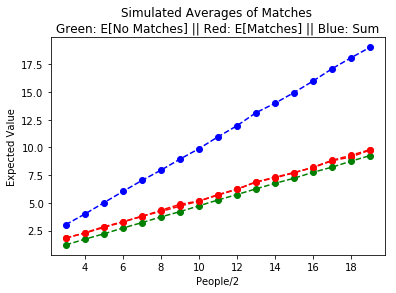

In [13]:
# 3.11.a
def hats_nomatch(n):
    
    hats = np.concatenate((np.full(n,1),np.full(n,0)))
    
    np.random.shuffle(hats)
    
    hats = np.reshape(hats, (n,2))
        
    sums = np.sum(hats, axis = 1)
    
    return np.sum(sums != 1)

#

def sim_hats_nomatch(n, num_sims = 10000):
    return np.mean([hats_nomatch(n) for i in range(num_sims)])

#

sim_hats_nomatch = np.vectorize(sim_hats_nomatch)

#

# 3.11.b
def hats_match(n):
    
    hats = np.concatenate((np.full(n,1),np.full(n,0)))
    
    np.random.shuffle(hats)
    
    hats = np.reshape(hats, (n,2))
        
    sums = np.sum(hats, axis = 1)
    
    return np.sum(sums == 1)

#

def sim_hats_match(n, num_sims = 1000):
    return np.mean([hats_match(n) for i in range(num_sims)])

#

sim_hats_match = np.vectorize(sim_hats_match)

##

people = np.arange(3,20)

vals = pd.DataFrame({
    'People': people,
    'E(match)': sim_hats_match(people),
    'E(no match)': sim_hats_nomatch(people)
})

vals['Sum'] = vals['E(match)'] + vals['E(no match)']

_ = plt.plot(vals['People'],
             vals['E(match)'], 
             'ro--')

_ = plt.plot(vals['People'],
            vals['E(no match)'],
            'go--')

# 3.11.a
def hats_nomatch(n):
    
    hats = np.concatenate((np.full(n,1),np.full(n,0)))
    
    np.random.shuffle(hats)
    
    hats = np.reshape(hats, (n,2))
        
    sums = np.sum(hats, axis = 1)
    
    return np.sum(sums != 1)

#

def sim_hats_nomatch(n, num_sims = 10000):
    return np.mean([hats_nomatch(n) for i in range(num_sims)])

#

sim_hats_nomatch = np.vectorize(sim_hats_nomatch)

#

# 3.11.b
def hats_match(n):
    
    hats = np.concatenate((np.full(n,1),np.full(n,0)))
    
    np.random.shuffle(hats)
    
    hats = np.reshape(hats, (n,2))
        
    sums = np.sum(hats, axis = 1)
    
    return np.sum(sums == 1)

#

def sim_hats_match(n, num_sims = 1000):
    return np.mean([hats_match(n) for i in range(num_sims)])

#

sim_hats_match = np.vectorize(sim_hats_match)

##

people = np.arange(3,20)

vals = pd.DataFrame({
    'People': people,
    'E(match)': sim_hats_match(people),
    'E(no match)': sim_hats_nomatch(people)
})

# 3.11.c
vals['Sum'] = vals['E(match)'] + vals['E(no match)']

_ = plt.plot(vals['People'],
             vals['E(match)'], 
             'ro--')

_ = plt.plot(vals['People'],
            vals['Sum'],
            'bo--')

_ = plt.ylabel('Expected Value')
_ = plt.xlabel('People/2')

_ = plt.title('Simulated Averages of Matches \nGreen: E[No Matches] || Red: E[Matches]')

_ = plt.ylabel('Expected Value')
_ = plt.xlabel('People/2')

_ = plt.title('Simulated Averages of Matches \nGreen: E[No Matches] || Red: E[Matches] || Blue: Sum')

# 3.12

Imagine a table with n chairs. Each round, we ‘toggle’ each chair (chairs can either be occupied or empty, and ‘toggling’ means to switch to the other state, like from empty to occupied) independently with probability 1/2 (if we don’t toggle a chair, it stays in the same state). Let $X_t$ be the number of filled seats at round t, and start at t=1.

a. Find $E(X_t)$.  

b. Let M be the first time that $X_t=n$; that is, the first time that the table is full. Find E(M).  

### 3.12 Analytical Solution

(a)  

It looks like we have lots of independently and identically distributed Bernoulli random variables. By definition, $X_t \sim Bin(n,1/2)$. The expectation is therefore n/2.

(b)

The probability that the table is full can be computed with the maximum value for the Binomial PMF. That is:

### $P(X = max(X)) = \binom{n}{n}p^nq^{n-n} = p^n$

Now that we have a probability number, we can use the First Success distribution to figure out the average amount of time we have to wait to see a success. The expected value is $1/p^n$. In this case p = 1/2, so we have $E(M) = 2^n$.

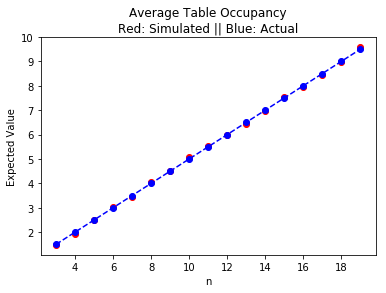

In [14]:
# 3.12.a
def sim_table(n):
    return np.sum(np.random.randint(0,2,n))

#

def sim_many_tables(n, sim_size = 1000):
    return np.mean([sim_table(n) for i in range(sim_size)])

sim_many_tables = np.vectorize(sim_many_tables)

#

def analit_prob(n):
    return n/2

analit_prob = np.vectorize(analit_prob)

#

ns = np.arange(3,20)

vals = pd.DataFrame({
    'n': ns,
    'Sim_prob': sim_many_tables(ns),
    'Real_prob': analit_prob(ns)
})

_ = plt.plot(vals['n'],
             vals['Sim_prob'], 
             'ro')

_ = plt.plot(vals['n'],
            vals['Real_prob'],
            'bo--')

_ = plt.ylabel('Expected Value')
_ = plt.xlabel('n')

_ = plt.title('Average Table Occupancy\nRed: Simulated || Blue: Actual')

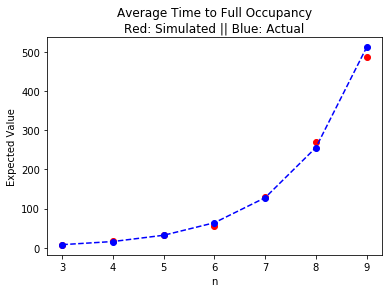

In [15]:
# 3.12.b
def sim_full_table(n):
    
    num_sims = 0
    
    while True:
        
        num_sims += 1
        
        total_people = np.sum(np.random.randint(0,2,n))
        
        if total_people == n:
            break
            
    return num_sims

#

def sim_many_full_tables(n, num_sims = 100):
    return np.mean([sim_full_table(n) for i in range(num_sims)])

sim_many_full_tables = np.vectorize(sim_many_full_tables)

#

def analyt_prob_full(n):
    return 2**n

analyt_prob_full = np.vectorize(analyt_prob_full)

#

ns = np.arange(3,10)

vals = pd.DataFrame({
    'n': ns,
    'Sim_prob': sim_many_full_tables(ns),
    'Real_prob': analyt_prob_full(ns)
})

_ = plt.plot(vals['n'],
             vals['Sim_prob'], 
             'ro')

_ = plt.plot(vals['n'],
            vals['Real_prob'],
            'bo--')

_ = plt.ylabel('Expected Value')
_ = plt.xlabel('n')

_ = plt.title('Average Time to Full Occupancy\nRed: Simulated || Blue: Actual')

# 3.13

Imagine a restaurant with n>1 tables. Each table has k≤n chairs. There are n people in the restaurant, and they are randomly assigned to the chairs in the restaurant. Let X be the number of empty tables. Find E(X).

### 3.13 Analytical Solution

Let's think of two practical examples. First, we'll consider a trivial situation where $n = 4$ and $k = 1$. Here's what this looks like:  

[X,X,X,X]  
[O] [O] [O] [O]

We know that there will be a 0% probability that *any* table is empty. There are only 4 empty seats and 4 people, every table must be filled.

Next, let's consider a less trivial situation where $n = 4$ and $k = 3$. Here's what that looks like:

[X,X,X,X]  
[O,O,O]  [O,O,O]  [O,O,O]  [O,O,O]  

In total there are $\binom{4*3}{4}$ ways to arrange the 4 people amongst any of the 12 spots in any of the tables. If we want to force the first table to be empty, we need to allocate the 4 people to the $(4-1)*3 = 9$ remaining spots at the other tables. So the probability of the first table being empty generalizes to:

## $P(empty) = \frac{\binom{(4-1)*3}{4}}{\binom{4*3}{4}} \approx 0.2545 \mapsto \frac{\binom{(n-1)*k}{n}}{\binom{n*k}{n}}$

Using the fundamental bridge and the linearity of expectation, we can extend this to the expected number of empty tables:  

## $E(x) = n * \frac{\binom{(n-1)*k}{n}}{\binom{n*k}{n}}$

In [16]:
def sim_rest(n,k):
    # setting tables up
    tables = np.concatenate((np.zeros(n*k-n),np.ones(n)))
    
    # randomly assigning seats
    np.random.shuffle(tables)
    
    # counting people per table
    tables = tables.reshape((n,k))
    
    sums = np.sum(tables, axis = 1)
    
    return np.sum(sums == 0)

#

def analt_probs(n,k):
    
    num = binom((n-1)*k,n)
    
    denom = binom(n*k,n)
    
    return (n * num/denom)

#

print('n = 4, k = 1')
print('Estimated Prob: %s' % np.mean([sim_rest(n = 4, k = 1) for i in range(10000)]))
print('Analytical Prob: %s\n' % analt_probs(n = 4, k = 1))

print('n = 4, k = 3')
print('Estimated Prob: %s' % np.mean([sim_rest(n = 4, k = 3) for i in range(10000)]))
print('Analytical Prob: %s' % analt_probs(n = 4, k = 3))

n = 4, k = 1
Estimated Prob: 0.0
Analytical Prob: 0.0

n = 4, k = 3
Estimated Prob: 1.0209
Analytical Prob: 1.018181818181818


# 3.14

We know that the Geometric distribution is memoryless, and if $Y \sim Geom(p)$, that $(Y + 1) \sim FS(p)$.

a. Find the CDF of $X$ if $X \sim FS(p)$.  

b. Recall the technical condition for memorylessness:  
$P(X \geq n + k | X \geq n) = P(X \geq k)$  

Test to see if Y is memoryless.  

c. Provide some intuition for your result in part b.  

### 3.14 Analytical Solution

a. First, let's rewrite the FS PMF and a naive representation of the CDF:  

## $P(X = x) = (1-p)^{x-1}*p \mapsto CDF(k) = \sum_{k=1}^{X} (1-p)^{k-1}*p$

The full CDF certainly looks like a [geometric series](https://onlinecourses.science.psu.edu/stat414/node/76), which sums to $ \frac{a}{1-r} = \frac{p}{1-(1-p)} = 1$.  

Next, let's think about splitting the CDF into $P(X \leq k) = 1 - P(X > k)$. Let's focus on the $P(X > k)$ component, which is equivalent to $P(X \geq k + 1)$. Our summation now becomes:  

### $\sum_{x=k+1}^{X} (1-p)^{x-1}*p = p*[(1-p)^{k+1-1} + (1-p)^{k+2-1} ... ] = p*[(1-p)^{k} + (1-p)^{k+1} ... ]$  

As highlighted above, the sum of a geometric series is $\frac{a}{1-r}$ where $a$ is the first term and $r$ is the ratio between consecutive terms:  

### $p*[\frac{(1-p)^k}{1 - (1-p)}] = p*[\frac{(1-p)^k}{p}] = (1-p)^k$  

This makes the CDF:  

## $CDF(k) = P(X \leq k) = 1 - P(X > k) = 1 - (1-p)^k$

b. We can set this up using the framework of Bayes' Theorem:  

## $P(X \geq n + k | X \geq n) = \frac{P(X \geq n + k \cap X \geq n)}{P(X \geq n)}$  

We know that $P(X \geq n)$ will always be a subset of $P(X \geq n + k)$, so we can collapse that probability:  

## $P(X \geq n + k | X \geq n) = \frac{P(X \geq n + k)}{P(X \geq n)}$  

Using the result from a, we have:

## $P(X \geq n + k | X \geq n) = \frac{(1-p)^{n+k-1}}{(1-p)^{n-1}} = (1-p)^k$  

Now we can see that this is clearly different from the unconditional probability $P(X \geq k) = (1-p)^{k-1}$, this is just a shifted version of (a). The distribution is **not** memoryless.  

c. The thing that really breaks the memorylessness is the fact that the support has been shifted. If we are at time step 0, we know that $P(X \geq 1) = 1$ - we will definitely see at least one success from $[1,\infty)$. $P(X \geq \text{ n + 1 | X }\geq n)$ doesn't have to equal 1.

In [17]:
n = 2
k = 1

Y = sps.geom.rvs(p = 1/7, size = 1000)

X = Y + 1

print(len(X[X >= n + k])/len(X[X >= n]))
print(len(X[X >= k])/1000)

0.866
1.0


# 3.15

“President” is a popular card game, and is played with a standard 52-card deck. Let’s consider a 4-person game. Each player is given a ‘title’ based on their past performance in the game. The best two players are “president” and “vice president” (best and second best, respectively) and the bottom two players are “scum” and “vice scum” (worst and second worst, respectively). Each player is dealt a random 13-card hand from the well-shuffled deck. The president gets to choose the two best cards in the scum’s hand; he then gives the scum his two worst cards. A similar transaction occurs between the vice president and vice scum, but with just 1 card.

The best card in the game is a 2, and since this is a standard deck, there are four 2’s in the deck (one for each suit).

a. Find the expected number of 2’s that each player gets before the ‘transactions’ (i.e., the hand they are dealt before they swap cards).

b. Assume that the president will always try to take as many 2’s as possible from the scum (and that he will never give up a 2). Let X be the number of 2’s that the president will end up with post-transaction (after he has taken two cards from the scum). Find E(X).

Hint: Consider Y, the number of 2’s the scum gets post transaction.

c. Explain why your answer to part (b) is not 2.

### 3.15 Analytical Solution

a. Since there are four players and four 2s, each player should get a single 2 card on average. This is by symmetry. Before any transactions, there's nothing special about any of the players to challenge the symmetry.  

b. There are only two cases where the scum gets to keep any 2s post transaction: the scum gets either 3 or 4 cards. In those cases, the scum will keep 1 and 2 cards respectively. Since the president is only allowed to take two cards, the scum must have something left over. Here are the probabilities:

## $P(Y = 1) = \frac{{4 \choose 3}{48 \choose 10}}{{52 \choose 13}} = p_1$
## $P(Y = 2) = \frac{\binom{4}{4}{48 \choose 9}}{{52 \choose 13}} = p_2$

We know by symmetry that the total 2s 'owned' between the two players should be 2 on average, regardless of any transactions. Using this we have:  

## $\text{E(Player 1) + E(Player 2) = 2}$  
## $\text{E(Player 1) = 2 - E(Player 2)} = 2 - 1*p_1 - 2*p_2 \approx 1.953$  

c. 2 would be the correct answer if the president could take any number of cards he wanted from the scum. Since we're putting an upper limit of 2 cards for the trade, the expected number has to be below 2. We're capping scenarios where the scum has 4 or 3 cards so that they only provide 2 cards to the president.

In [18]:
# Generic game simulator
def sim_game():

    cards = np.tile(np.arange(1,14), (4,1))

    np.random.shuffle(cards.reshape(-1))

    return cards

# (a) True by symmetry and simulation
np.mean([np.mean(np.sum(sim_game() == 1, axis=1)) for i in range(1000)])

1.0

In [19]:
# (b)

sim_res = np.zeros(10000)

for i in range(len(sim_res)):
    hand0 = sim_game()[0,:]
    hand1 = sim_game()[1,:]

    hand0_2s = np.sum(hand0 == 2)
    hand1_2s = np.sum(hand1 == 2)
    
    sim_res[i] = hand0_2s + np.min((2, hand1_2s))

np.mean(sim_res)

1.9426

# 3.16

You are dealt a random 5-card hand from a standard, well-shuffled 52-card deck. Let X be the number of Aces that you get. Find Var(X).

### 3.16 Analytical Solution

We have a sample size of n = 5, with w = 4 desired objects in the population, and b = 48 undesired items. This phenomenon follows a Hypergeometric distribution. We can find the definition for the Mean and Var in Blitzstein and Chen's [cheatsheet](http://www.wzchen.com/probability-cheatsheet/):

## $Mean = \frac{nw}{b + w} = 5/13 \approx .385$  

## $Var = \frac{w+b-n}{w+b-1} * n * \frac{Mean}{n} * (1 - \frac{Mean}{n}) = 940/2873 \approx .327$  

In [20]:
def sim_game():

    cards = np.tile(np.arange(1,14), (4,1))

    np.random.shuffle(cards.reshape(-1))

    return np.sum(cards.reshape(-1)[0:5] == 1)

#

sims = [sim_game() for i in range(10000)]

print('Mean %s' % np.round(np.mean(sims),2))
print('Var %s' % np.round(np.var(sims),2))

Mean 0.38
Var 0.32


# 3.17

Let Ij be the indicator that you roll a j on one roll of a fair die, and let X = I1 + I2 + ... + I6. Nick claims that X∼Bin(1,1/6), since X is the sum of Bern(1/6) r.v.’s. Argue for or against his claim.

### 3.17 Analytical Solution

Since we're rolling only once, the die must take on a single value from 1 to 6. Therefore the indicator must be 'on' for at least one $I_j$ and always 'off' for the others. The particular $I_j$ will vary but the sum must always be 1 - with no variance. This is a constant degenerate random variable.

# 3.18

Juan is reading a book with 10 pages. He starts on page 3 and flips forward a page (i.e., page 3 to 4) with probability p and backwards with probability 1−p. What is the probability that he flips to the end of the book (flips to page 10) before flipping backwards more than once?

### 3.18 Analytical Solution

Let's set the problem up visually:  

[2, **3**, 4, 5, 6, 7, 8, 9, 10]  

There are two path types that we can observe generally:  
1) Juan flips 7 pages forward in one go  
2) Juan flips n pages forward, one page backward, and 10-(3+n-1) pages forward  

These are mutually exclusive events, which we can add to get the total probability of getting to 10 first. The first path type is easy, that's just $p^7$.

Let's think about a practical example for the second option. We go 4 pages forward, one page backward, and 10 - (3 + n - 1) = 4 pages forward again. That probability becomes:

### $p^4(1-p)p^4 = p^8(1-p)$

Another example would be: 6 pages forward, one page backward, and 2 pages forward. That becomes:

### $p^6(1-p)p^2 = p^8(1-p)$

This relationship holds true for any $0 \leq n \leq 6$. We must always go 8 pages forward in total when we have any path where we go backwards once. This gives us 7 independent situations that fall under (2), which all have a probability of ending in 10 of $p^8(1-p)$.  

Bringing together (1) and (2) gives us:

## $P(\text{10 first}) = p^7 + 7p^8(1-p)$

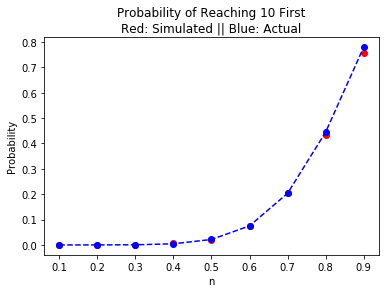

In [21]:
# Setting up simulation function
def run_sim(p):
    
    pos = 3
    move = 0
    
    while True:

        next_move = np.random.choice(a = [-1,1], size = 1, p = (1-p,p))

        # Keeping count if we've move backwards more than once
        if next_move == -1:
            move += next_move

        # Absolute position
        pos += next_move

        if pos == 10:
            break

        if move == -2:
            break

    if pos == 10:
        return 1
    else:
        return 0

#

def sim_many_paths(p, num_sims = 1000):
    return np.mean([run_sim(p = p) for i in range(num_sims)])

sim_many_paths = np.vectorize(sim_many_paths)

#

def calc_solution(p):
    return (p**7 + 7 * (p**8) * (1-p))

calc_solution = np.vectorize(calc_solution)

#

ps = np.linspace(start = 0, stop = 1, num = 11)[1:10]

vals = pd.DataFrame({
    'p': ps,
    'Sim_prob': sim_many_paths(ps),
    'Real_prob': calc_solution(ps)
})

_ = plt.plot(vals['p'],
             vals['Sim_prob'], 
             'ro')

_ = plt.plot(vals['p'],
            vals['Real_prob'],
            'bo--')

_ = plt.ylabel('Probability')
_ = plt.xlabel('n')

_ = plt.title('Probability of Reaching 10 First\nRed: Simulated || Blue: Actual')

# 3.19

A binary number is a number expressed in the base-2 numeral system; it only includes the digits 0 and 1. It is perhaps best understood with an example. The binary number…  

10110  

…can easily be written in our standard, decimal (base-10) system, by raising each digit in the binary number to the appropriate value of 2 (based on its location in the string). That is, we convert to decimal with the calculation $2^5+0+2^3+2^1+0=42$ (since there is a ‘1’ in the ‘fifth’ spot - that is, five spots from the left - so this marks that we should add 25, and there is a 0 in the fourth spot, so we don’t have to add anything here).  

a. Consider a binary number with n digits. How many possible decimal numbers can we express with this binary number?  

For the next two parts, consider a binary number with n digits, where each digit is randomly assigned 0 or 1 with equal possibilities. Let X be decimal value of this binary number (i.e., the value when we translate it to base-10).  

b. Find the probability that X is even.  

c. Find the distribution of X.  

### 3.19 Analytical Solution

a. Let's list a few values for 'n' first:  

n = 2 --> [00,01,10,11] --> [0,1,2,3]  
n = 3 --> [000,001,010,011,100,101,110,111] --> [0,1,2,3,4,5,6,7]  

The general pattern is that we can always represent zero and any integer up to $2^n-1$. That gives us $2^n$ decimal numbers. We can also remember the [Sampling Table](https://bookdown.org/probability/beta/counting.html#sampling-table) and realize we're sampling [0,1] k times with replacement where order matters.  

b. When we take a look at the two examples above, we notice that every sequence starts with an even number (0) and ends with an odd number. If we group the numbers, [0,2,4,6 | 1,3,5,7], we notice that we always end up with 50% even numbers. This is true for any $n \geq 1$.

c. Since we're randomly sampling bits and we can represent any number in [0, $2^n - 1$], it must be that each decimal number in that range has equal probability. This gives us a discrete uniform distribution. 

You can learn more about binary digits and other computer related topics in [Code](http://www.charlespetzold.com/code/) by Charles Petzold.

# 3.20

This riddle is a common interview problem:



A king has imprisoned 10 subjects. He offers the prisoners a strange way that they can play for their release: each day, he will randomly and independently call one of the 10 prisoners in. That prisoner will be allowed to either guess if all of the prisoners have already been called in, or ‘pass’ and return to the dungeon for another day. If a prisoner correctly guesses that all of the prisoners have been called in already, the prisoners are set free; otherwise, they lose.

The prisoners are kept in different cells and are not allowed to communicate except through one strange channel: in the kings’ chamber sits a standard, two-sided coin, and every day, the prisoner that is randomly selected to be summoned may choose to flip the coin over (heads to tails or tails to heads) or simply leave the coin unflipped. The coin starts with heads showing.

The ‘random sampling’ of the king (picking one of the 10 prisoners each day) is truly random and independent across days. The prisoners are allowed to discuss a strategy session before entering their cells. How can they guarantee their escape?



The answer to the riddle is a follows: the prisoners assign one prisoner to be the ‘White Knight’ who simply keeps track of the number of prisoners that have been called. To do this, the prisoners institute a rule: if a prisoner that is not the White Knight is summoned and he sees that the coin shows heads, he flips the coin over to show tails. From there, no other non-White Knight prisoner will flip the coin (it shows tails, not heads) and when the White Knight enters and sees the coin showing tails, he will add one to his count and flip the coin back over to show heads (the process begins again). Once a non-White Knight prisoner has flipped the coin from heads to tails, he doesn’t flip it again, even if he sees heads (to avoid double-counting). When the White Knight has flipped the coin 9 times (he has counted the other 9 prisoners) he can safely tell the king that all of the prisoners have been called.

If the prisoners use this strategy, how long will it take, on average, for them to be freed? How does this compare to the actual average amount of time that it will take for each prisoner to be called in?

### 3.20 Analytical Solution

Let's first focus on the average amount of time that it will take for each prisoner to be called in. If we've already called in 3 prisoners, we still haven't seen the other 7. For the next random sampling, there's a 7/10 probability that we'll see a new prisoner. Using the First Success distribution, on average we'll have to wait 1/(7/10) = 3.33 time steps to achieve this. This includes the time step in which we've seen the new prisoner.

Generally, if we've seen $n$ prisoners already, where $0 \leq n \leq 9$, we will have to wait 1/p time steps to see the $n^{th}$ new prisoner. p in this case will be (10-n)/(10). Using the linearity of expectation gives us:

### $\text{E(total wait) = E(wait given seen 0) + E(wait given seen 1) + ... + E(wait given seen 9)}$

### $\text{E(total wait)} = 1/((10-0)/10) + 1/((10-1)/10) + ... + 1/((10-9)/10) \approx 29.29$

Next, let's think about the time it will take for the strategy to complete. We can build off the logic above. When we've seen no new prisoners, we have a 9/10 probability of seeing a new prisoner that *isn't* a white knight. Once we've seen the prisoner, there's a 1/10 probability that we'll see the white knight. This relationship continues until we're seen all of the prisoners and we're waiting for the last turn where the white knight can get everyone released. We can convert the probabilities into expectations and sum them up to get:

#### $\text{E(game time) = [E(wait for first non-wk pris) + E(wait for wk)] + [E(wait for second non-wk pris) + E(wait for wk)...]}$

### $\text{E(game time)} = \frac{10}{9} + 10 + \frac{10}{8} + 10 + ... + 10 + 10 \approx 118$

In [22]:
# Average time for all prisoners to be called in
def sim_round():
    
    pris = np.ones(10)

    t = 0

    while True:
        t += 1

        pris[np.random.randint(low = 0, high = 10, size = 1)] = 0

        if np.sum(pris) == 0:
            break

    return t

#

print('Average number of time for all prisoners to be called in:')
print(np.mean([sim_round() for i in range(10000)]))

Average number of time for all prisoners to be called in:
29.3108


In [23]:
# Average time for strategy to complete
# `White knight` is player 0
def sim_game():
    
    pris = np.ones(10)
    
    t = 0
    
    while True:
        
        t += 1
        
        inx  = np.random.randint(low = 0, high = 10, size = 1)
        
        # Skip if we're the white knight
        if inx == 0:
            continue
        
        # Skip if the prisoner already flipped before
        if pris[inx] == 0:
            continue
        
        # Waiting until the white night comes around to flip
        while True:
            
            t += 1
            
            inx2  = np.random.randint(low = 0, high = 10, size = 1)
        
            if inx2 == 0:
                pris[inx] = 0
                break
    
        if np.sum(pris) == 1:
            break

    return t 

#

print('Average number of time to complete game:')
print(np.mean([sim_game() for i in range(5000)]))

Average number of time to complete game:
117.7772
